### Chop up existing dataset images

In [1]:
import cv2 as cv
import numpy as np
from matplotlib import colors
import matplotlib.pyplot as plt
from scipy import stats as st

##### Explore Color Spaces for Ripe Berries

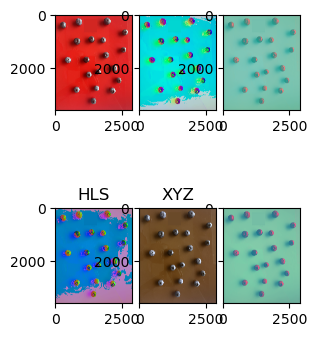

In [2]:
ripe_path = 'R_02.jpg'
img = cv.imread('../img/test_set/ripe/'+ripe_path)

# convert from BGR to other color spaces
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
img_hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)
img_lab = cv.cvtColor(img, cv.COLOR_BGR2LAB)
img_luv = cv.cvtColor(img, cv.COLOR_BGR2LUV)
img_hls = cv.cvtColor(img, cv.COLOR_BGR2HLS)
img_xyz = cv.cvtColor(img, cv.COLOR_BGR2XYZ)

# display image in color spaces
fig = plt.figure()
gridspec = fig.add_gridspec(nrows=4, ncols=12)
fig.add_subplot(gridspec[0:2, 0:2])
plt.imshow(img_rgb)
fig.add_subplot(gridspec[0:2, 2:4])
plt.imshow(img_hsv)
fig.add_subplot(gridspec[0:2, 4:6])
plt.imshow(img_lab)
fig.add_subplot(gridspec[2:4, 4:6])
plt.imshow(img_luv)
fig.add_subplot(gridspec[2:4, 0:2])
plt.title("HLS")
plt.imshow(img_hls)
fig.add_subplot(gridspec[2:4, 2:4])
plt.title("XYZ")
plt.imshow(img_xyz)

##### Explore Color Spaces for Overripe Berries

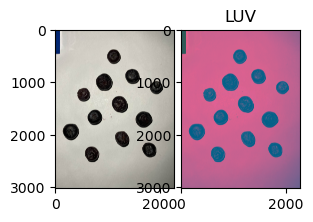

In [3]:
overripe_path = 'ORN_02.jpg'
imgOR = cv.imread('../img/test_set/overripe/'+overripe_path)

# convert from BGR to other color spaces
imgOR_rgb = cv.cvtColor(imgOR, cv.COLOR_BGR2RGB)
imgOR_luv = cv.cvtColor(imgOR, cv.COLOR_BGR2LUV)

# display image in color spaces
fig = plt.figure()
gridspec = fig.add_gridspec(nrows=2, ncols=12)
fig.add_subplot(gridspec[0:2, 0:3])
plt.imshow(imgOR_rgb)
fig.add_subplot(gridspec[0:2, 3:6])
plt.title("LUV")
plt.imshow(imgOR_luv)

##### Explore Color Spaces for Unripe Berries

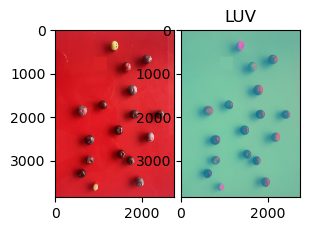

In [4]:
unripe_path = 'UR_02.jpg'
imgUR = cv.imread('../img/test_set/unripe/'+unripe_path)

# convert from BGR to other color spaces
imgUR_rgb = cv.cvtColor(imgUR, cv.COLOR_BGR2RGB)
imgUR_luv = cv.cvtColor(imgUR, cv.COLOR_BGR2LUV)

# display image in color spaces
fig = plt.figure()
gridspec = fig.add_gridspec(nrows=2, ncols=12)
fig.add_subplot(gridspec[0:2, 0:3])
plt.imshow(imgUR_rgb)
fig.add_subplot(gridspec[0:2, 3:6])
plt.title("LUV")
plt.imshow(imgUR_luv)

##### Split images into color channels

In [5]:
norm = colors.Normalize(vmin=-1.,vmax=1.)

pixel_colors = img_luv.reshape((np.shape(img_luv)[0]*np.shape(img_luv)[1], 3))
OR_pixel_colors = imgOR_luv.reshape((np.shape(imgOR_luv)[0]*np.shape(imgOR_luv)[1], 3))
UR_pixel_colors = imgUR_luv.reshape((np.shape(imgUR_luv)[0]*np.shape(imgUR_luv)[1], 3))

norm.autoscale(pixel_colors)
norm.autoscale(OR_pixel_colors)
norm.autoscale(UR_pixel_colors)
pixel_colors = norm(pixel_colors).tolist()
OR_pixel_colors = norm(OR_pixel_colors).tolist()
UR_pixel_colors = norm(UR_pixel_colors).tolist()

x, y, z = cv.split(img_luv)
rl_mode = st.mode(x.flatten(), keepdims=0)
rl_avg = np.average(x.flatten())
rl_med = np.median(x.flatten())
ru_mode = st.mode(y.flatten(), keepdims=0)
ru_avg = np.average(y.flatten())
ru_med = np.median(y.flatten())
rv_mode = st.mode(z.flatten(), keepdims=0)
rv_avg = np.average(z.flatten())

or_l, or_u, or_v = cv.split(imgOR_luv)
orl_mode = st.mode(or_l.flatten(), keepdims=0)
orl_avg = np.average(or_l.flatten())
oru_mode = st.mode(or_u.flatten(), keepdims=0)
oru_avg = np.average(or_u.flatten())
orv_mode = st.mode(or_v.flatten(), keepdims=0)
orv_avg = np.average(or_v.flatten())

ur_l, ur_u, ur_v = cv.split(imgUR_luv)
url_mode = st.mode(ur_l.flatten(), keepdims=0)
url_avg = np.average(ur_l.flatten())
uru_mode = st.mode(ur_u.flatten(), keepdims=0)
uru_avg = np.average(ur_u.flatten())
urv_mode = st.mode(ur_v.flatten(), keepdims=0)
urv_avg = np.average(ur_v.flatten())

##### Visualize color distribution for berry images

In [6]:
# fig_3d = plt.figure()
# xyz_axis = fig_3d.add_subplot(1, 2, 1, projection="3d")
# xyz_axis.scatter(x.flatten(), y.flatten(), z.flatten(), facecolors=pixel_colors, marker=".")
# xyz_axis.set_xlabel("L")
# xyz_axis.set_ylabel("U")
# xyz_axis.set_zlabel("V")
# plt.title('Ripe')

# plt.title('Ripe')
# plt.scatter(x.flatten(), y.flatten(), facecolors=pixel_colors, marker=".")
# plt.xlabel("L")
# plt.ylabel("U")
# plt.figure()

# plt.figure().add_subplot(1, 2, 1, projection="3d").scatter(or_l.flatten(), or_u.flatten(), or_v.flatten(), facecolors=OR_pixel_colors, marker=".")
# plt.title('Overripe')
# plt.scatter(or_v.flatten(), or_u.flatten(), facecolors=OR_pixel_colors, marker=".")
# plt.xlabel("L")
# plt.ylabel("U")
# plt.figure()

# plt.scatter(or_u.flatten(), or_v.flatten(), facecolors=OR_pixel_colors, marker=".")
# plt.xlabel("U")
# plt.ylabel("V")
# plt.figure()

# fig_3d = plt.figure()
# xyz_axis = fig_3d.add_subplot(1, 2, 1, projection="3d")
# xyz_axis.scatter(ur_l.flatten(), ur_u.flatten(), ur_v.flatten(), facecolors=UR_pixel_colors, marker=".")
# xyz_axis.set_xlabel("L")
# xyz_axis.set_ylabel("U")
# xyz_axis.set_zlabel("V")

# plt.title('Underripe')
# plt.scatter(ur_l.flatten(), ur_u.flatten(), facecolors=UR_pixel_colors, marker=".")
# plt.xlabel("L")
# plt.ylabel("U")
# plt.figure()

# plt.scatter(ur_u.flatten(), ur_v.flatten(), facecolors=UR_pixel_colors, marker=".")
# plt.xlabel("U")
# plt.ylabel("V")
# plt.figure()

# plt.imshow(img_luv)

##### Define and apply mask

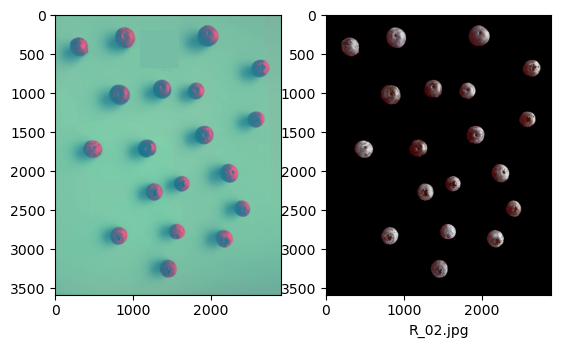

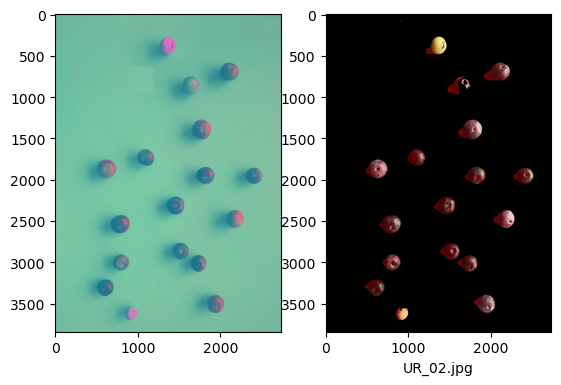

In [7]:
luv_lo = (10, 70, 100) # initial test conditions
luv_hi = (250, 125, 160)
# luv_lo = (0, 70, 100) # lab conditions
# luv_hi = (95, 125, 134)

luvur_lo = (0, 70, 120)
luvur_hi = (255, 145, 220)

mask_luv = cv.inRange(img_luv, luv_lo, luv_hi)
mask_UR = cv.inRange(imgUR_luv, luvur_lo, luvur_hi)
maskOR_luv = cv.inRange(imgOR_luv, luv_lo, luv_hi)
result = cv.bitwise_and(img_rgb, img_rgb, mask=mask_luv)
result_OR = cv.bitwise_and(imgOR_rgb, imgOR_rgb, mask=maskOR_luv)
result_UR = cv.bitwise_and(imgUR_rgb, imgUR_rgb, mask=mask_UR)
# result_luv = cv.bitwise_and(img_luv, img_luv, mask=mask_luv)

plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(img_luv)
plt.subplot(1, 2, 2)
plt.imshow(result)
plt.xlabel(ripe_path)
plt.show()

# plt.figure()
# plt.subplot(1, 2, 1)
# plt.imshow(imgOR_luv)
# plt.subplot(1, 2, 2)
# plt.imshow(result_OR)
# plt.xlabel(overripe_path)
# plt.show()

plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(imgUR_luv)
plt.subplot(1, 2, 2)
plt.imshow(result_UR)
plt.xlabel(unripe_path)
plt.show()

##### Determine the color channel with the largest difference between ripeness categories

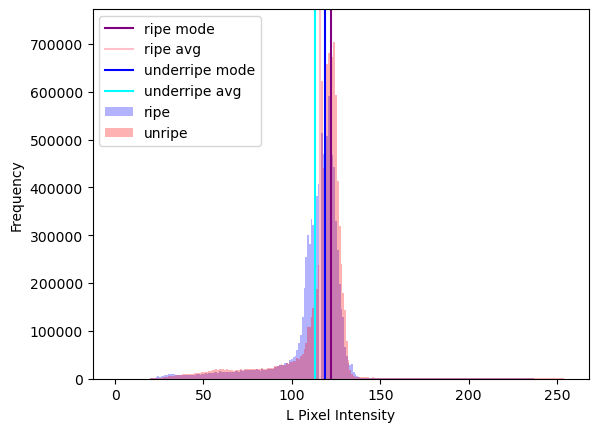

URR Diff is: 3


In [8]:
histSize = 256
histRange = (0, 255)
plt.figure()
URLcounts = plt.hist(ur_l.flatten(), bins=histSize, range=histRange, alpha=0.3, color='b')
RLcounts = plt.hist(x.flatten(), bins=histSize, range=histRange, alpha=0.3, color='r')
# plt.hist(or_l.flatten(), bins=histSize, range=histRange, alpha=0.3, color='g')
plt.axvline(x = rl_mode.mode, color = 'purple')
plt.axvline(x = rl_avg, color = 'pink')
# plt.axvline(x = orl_mode.mode, color = 'lime')
plt.axvline(x = url_mode.mode, color = 'blue')
plt.axvline(x = url_avg, color = 'cyan')
plt.legend(('ripe mode', 'ripe avg','underripe mode','underripe avg','ripe','unripe'), loc = 'upper left')
plt.xlabel('L Pixel Intensity'), plt.ylabel('Frequency')
plt.show()
orr_ldiff = np.abs(orl_mode.mode - rl_mode.mode) if orl_mode.mode > rl_mode.mode else np.abs(rl_mode.mode - orl_mode.mode)
urr_ldiff = np.abs(url_mode.mode - rl_mode.mode) if url_mode.mode > rl_mode.mode else np.abs(rl_mode.mode - url_mode.mode)
# print(f'ORR Diff is: {orr_ldiff}')
print(f'URR Diff is: {urr_ldiff}')

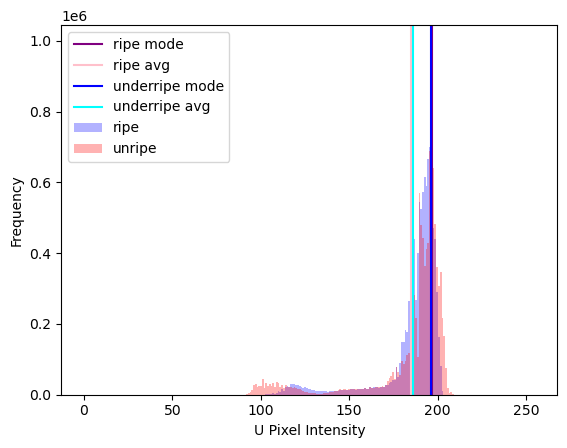

URR Diff is: 1


In [9]:
plt.figure()
# TODO convert hist to 1D vectors where index is pixel intensity and value is frequency
URUcounts = plt.hist(ur_u.flatten(), bins=histSize, range=histRange, alpha=0.3, color='b')
RUcounts = plt.hist(y.flatten(), bins=histSize, range=histRange, alpha=0.3, color='r')
# plt.hist(or_u.flatten(), bins=histSize, range=histRange, alpha=1, color='g')
plt.axvline(x = ru_mode.mode, color = 'purple')
plt.axvline(x = ru_avg, color = 'pink')
# plt.axvline(x = oru_mode.mode, color = 'lime')
plt.axvline(x = uru_mode.mode, color = 'blue')
plt.axvline(x = uru_avg, color = 'cyan')
plt.legend(('ripe mode', 'ripe avg','underripe mode','underripe avg','ripe','unripe'), loc = 'upper left')
plt.xlabel('U Pixel Intensity'), plt.ylabel('Frequency')
plt.show()

orr_udiff = np.abs(oru_mode.mode - ru_mode.mode) if oru_mode.mode > ru_mode.mode else np.abs(ru_mode.mode - oru_mode.mode)
urr_udiff = np.abs(uru_mode.mode - ru_mode.mode) if uru_mode.mode > ru_mode.mode else np.abs(ru_mode.mode - uru_mode.mode)
# print(f'ORR Diff is: {orr_udiff}')
print(f'URR Diff is: {urr_udiff}')

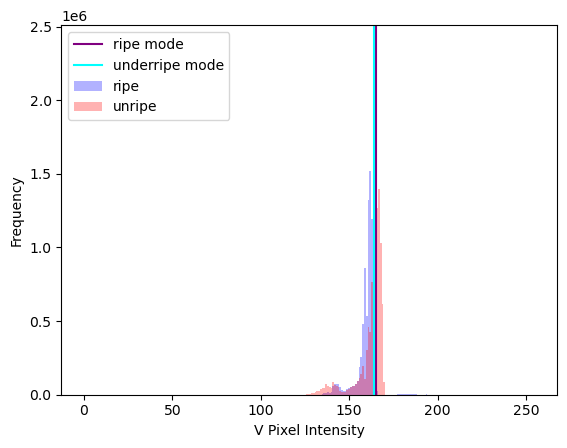

URR Diff is: 1


In [10]:
plt.figure()
URVcounts = plt.hist(ur_v.flatten(), bins=histSize, range=histRange, alpha=0.3, color='b')
RVcounts = plt.hist(z.flatten(), bins=histSize, range=histRange, alpha=0.3,  color='r')
# plt.hist(or_v.flatten(), bins=histSize, range=histRange, alpha=1, color='g')
plt.axvline(x = rv_mode.mode, color = 'purple')
# plt.axvline(x = orv_mode.mode, color = 'lime')
plt.axvline(x = urv_mode.mode, color = 'cyan')
plt.legend(('ripe mode','underripe mode','ripe','unripe'), loc = 'upper left')
plt.xlabel('V Pixel Intensity'), plt.ylabel('Frequency')
plt.show()
orr_vdiff = np.abs(orv_mode.mode - rv_mode.mode) if orv_mode.mode > rv_mode.mode else np.abs(rv_mode.mode - orv_mode.mode)
urr_vdiff = np.abs(urv_mode.mode - rv_mode.mode) if urv_mode.mode > rv_mode.mode else np.abs(rv_mode.mode - urv_mode.mode)
# print(f'ORR Diff is: {orr_vdiff}')
print(f'URR Diff is: {urr_vdiff}')

##### Convert histograms to 1D vectors

In [33]:
def norm(vector):
    return np.sqrt(sum(x * x for x in vector))    

def cosine_similarity(vec_a, vec_b):
        norm_a = norm(vec_a)
        norm_b = norm(vec_b)
        dot = sum(a * b for a, b in zip(vec_a, vec_b))
        return dot / (norm_a * norm_b) if norm_a * norm_b != 0 else 0.0

#pixel intensity vectors [0] is the value, [1] is the bins?
URLvalues = URLcounts[0].tolist()
URUvalues = URUcounts[0].tolist()
URVvalues = URVcounts[0].tolist()

RLvalues = RLcounts[0].tolist()
RUvalues = RUcounts[0].tolist()
RVvalues = RVcounts[0].tolist()

URRLsim = cosine_similarity(URLvalues, RLvalues)
URRUsim = cosine_similarity(URUvalues, RUvalues)
URRVsim = cosine_similarity(URVvalues, RVvalues)
print(f"Similiarity between Unripe and Ripe L Values: {URRLsim}")
print(f"Similiarity between Unripe and Ripe U Values: {URRUsim}")
print(f"Similiarity between Unripe and Ripe V Values: {URRVsim}")

Similiarity between Unripe and Ripe L Values: 0.9207908984677836
Similiarity between Unripe and Ripe U Values: 0.9210007439581082
Similiarity between Unripe and Ripe V Values: 0.5232882021705821
